In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
datos = pd.read_csv(filepath_or_buffer="/users/angel/Downloads/comprar_alquilar.csv")
print(datos.head())
datos.dropna(inplace=True)
print(datos.describe())

   ingresos  gastos_comunes  pago_coche  gastos_otros  ahorros  vivienda  \
0      6000            1000           0           600    50000    400000   
1      6745             944         123           429    43240    636897   
2      6455            1033          98           795    57463    321779   
3      7098            1278          15           254    54506    660933   
4      6167             863         223           520    41512    348932   

   estado_civil  hijos  trabajo  comprar  
0             0      2        2        1  
1             1      3        6        0  
2             2      1        8        1  
3             0      0        3        0  
4             0      0        3        1  
          ingresos  gastos_comunes  pago_coche  gastos_otros       ahorros  \
count   202.000000      202.000000  202.000000    202.000000    202.000000   
mean   4958.995050      971.584158  211.742574    515.425743  38749.668317   
std    1682.862556      272.106351  124.940754    1

In [3]:
X = datos.drop('comprar', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
fa = FactorAnalysis(n_components=2, random_state=42)
X_fa = fa.fit_transform(X_scaled)

Modelo guardado como 'modelo_analisis_factorial.pkl'


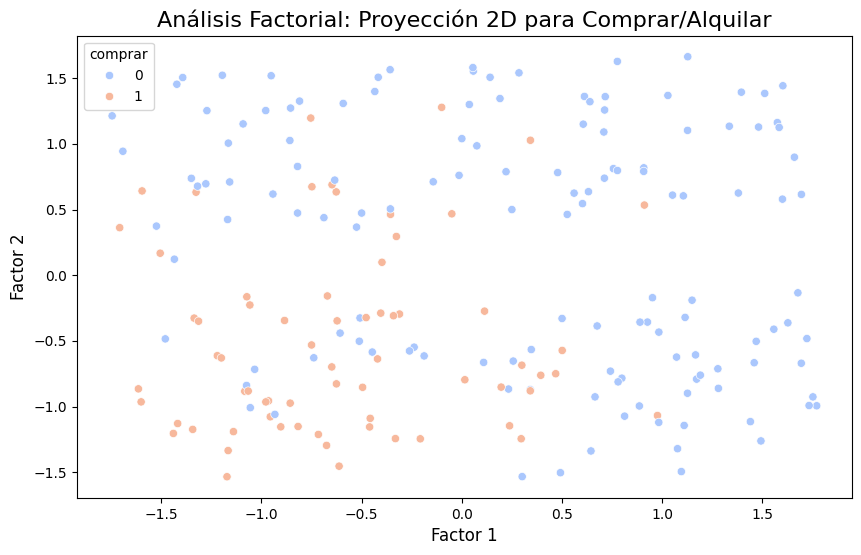

In [4]:
joblib.dump(fa, 'modelo_analisis_factorial.pkl')
print("Modelo guardado como 'modelo_analisis_factorial.pkl'")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_fa[:, 0], y=X_fa[:, 1], hue=datos['comprar'], palette='coolwarm')
plt.title('Análisis Factorial: Proyección 2D para Comprar/Alquilar', fontsize=16)
plt.xlabel('Factor 1', fontsize=12)
plt.ylabel('Factor 2', fontsize=12)
plt.savefig('comprar_alquilar_fa.png')
plt.show()